In [2]:
import os
import glob
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

cameras = [
    ["CAM02009CCTV7.jpg", 
     "I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)","no change",40.944571,-77.720918],
    ["CAM02001CCTV2.jpg", 
     "Port Matilda US-322 By-Pass Westbound","changed 4/27",40.810961,-78.075259],
    ["CAM02010CCTV11.jpg", 
     "Port Matilda I-99 Exit 61 Median","no change",40.803880,-78.063664],
    ["CAM02005CCTV9.jpg", 
     "Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220","no change",40.955477,-77.773749],
    ["CAM02006CCTV10.jpg", 
     "Milesburg Interchange East I-80 Exit 158 Westbound / PA-150","changed 4/27",40.956061,-77.766277],
    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817],
    ["CAM02002CCTV3.jpg",
     "Grays Woods","changed 5/3",40.817144,-77.939841],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["CAM02046CCTV52.jpg",
     "I-99 at Exit 71 (Toftrees)","changed 5/5",40.817953,-77.900271],
    ["CAM02033CCTV38.jpg",
     "Snowshoe I-80 Exit 147","no change",41.022703,-77.933981],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219]
    ]

camdfs = pd.DataFrame(cameras,columns = ['ID','Description','status','Latitude','Longitude'])
camdfs[['ID','Description','status']]

,ID,Description,status
0,CAM02009CCTV7.jpg,I-80 Eastbound Exit 161 Bellefonte Interchange...,no change
1,CAM02001CCTV2.jpg,Port Matilda US-322 By-Pass Westbound,changed 4/27
2,CAM02010CCTV11.jpg,Port Matilda I-99 Exit 61 Median,no change
3,CAM02005CCTV9.jpg,Milesburg Interchange West I-80 Exit 158 Eastb...,no change
4,CAM02006CCTV10.jpg,Milesburg Interchange East I-80 Exit 158 Westb...,changed 4/27
5,CAM02028CCTV32.jpg,Atherton and Valley Vista,no change
6,CAM02037CCTV43.jpg,Atherton and Vairo,no change
7,CAM02038CCTV44.jpg,Atherton and North Hills,no change
8,CAM02039CCTV45.jpg,Atherton and Park,no change
9,CAM02040CCTV46.jpg,Atherton and W.College,changed 5/2


In [4]:
# Loading all camera data...

#xdf = pd.read_csv("/home/ubuntu/nitelite/full_vehicles_427-615-partial-all-cameras.csv")
xdf = pd.read_csv("allcams1128.csv")
xdf['datetime_EST'] = pd.to_datetime(xdf['datetime_EST'])
xdf.sort_values(by='datetime_EST')



,datetime_UTC,image_file,vehicle_count,datetime_EST,camera_name
0,2020-04-27 00:00:02,/home/ubuntu/cams1/20200427_000002_CAM02033CCT...,0,2020-04-26 20:00:02,CAM02033CCTV38
1,2020-04-27 00:00:05,/home/ubuntu/cams1/20200427_000005_collegeTwp.jpg,2,2020-04-26 20:00:05,collegeTwp
2,2020-04-27 00:00:08,/home/ubuntu/cams1/20200427_000008_CAM02028CCT...,1,2020-04-26 20:00:08,CAM02028CCTV32
3,2020-04-27 00:00:10,/home/ubuntu/cams1/20200427_000010_CAM02037CCT...,3,2020-04-26 20:00:10,CAM02037CCTV43
4,2020-04-27 00:00:12,/home/ubuntu/cams1/20200427_000012_CAM02038CCT...,0,2020-04-26 20:00:12,CAM02038CCTV44
...,...,...,...,...,...
7838697,2020-11-28 18:49:37,/home/ubuntu/cams38/CAM02020CCTV24/20201128/20...,0,2020-11-28 14:49:37,CAM02020CCTV24
7838698,2020-11-28 18:49:39,/home/ubuntu/cams38/CAM02002CCTV3/20201128/202...,0,2020-11-28 14:49:39,CAM02002CCTV3
7838699,2020-11-28 18:49:41,/home/ubuntu/cams38/CAM02007CCTV13/20201128/20...,0,2020-11-28 14:49:41,CAM02007CCTV13
7838700,2020-11-28 18:49:43,/home/ubuntu/cams38/CAM02046CCTV52/20201128/20...,0,2020-11-28 14:49:43,CAM02046CCTV52


In [5]:
icdf = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]

In [6]:
def get_vcc_avg(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/60.0))
    return(rv)

def get_vcc_avg_daily(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 60.0)))
    return(rv)

def get_vcc_avg_weekly(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 7.0 * 60.0)))
    return(rv)  

In [7]:
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

In [8]:
icdfcvc.to_csv("vehicle_avg_per_hour_each_camera_427-1128.csv",index=False)

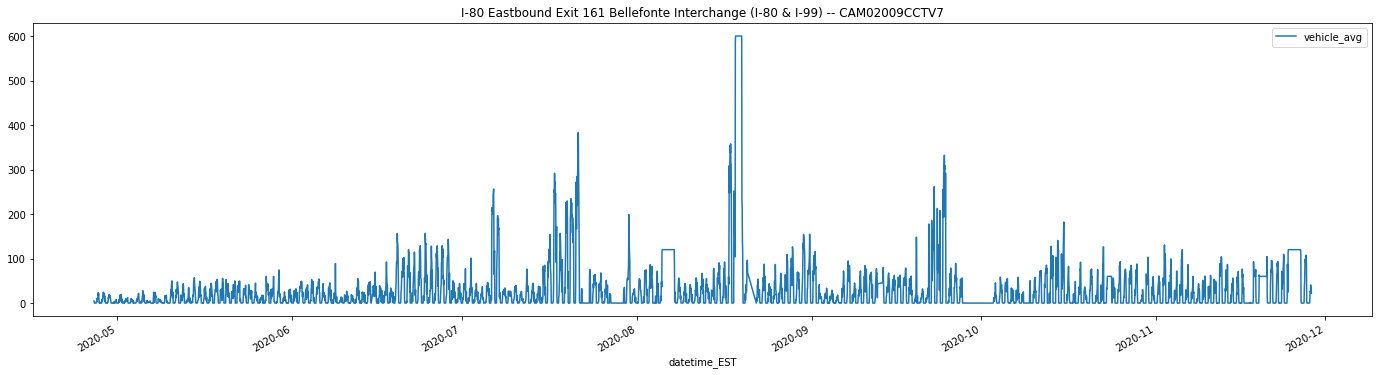

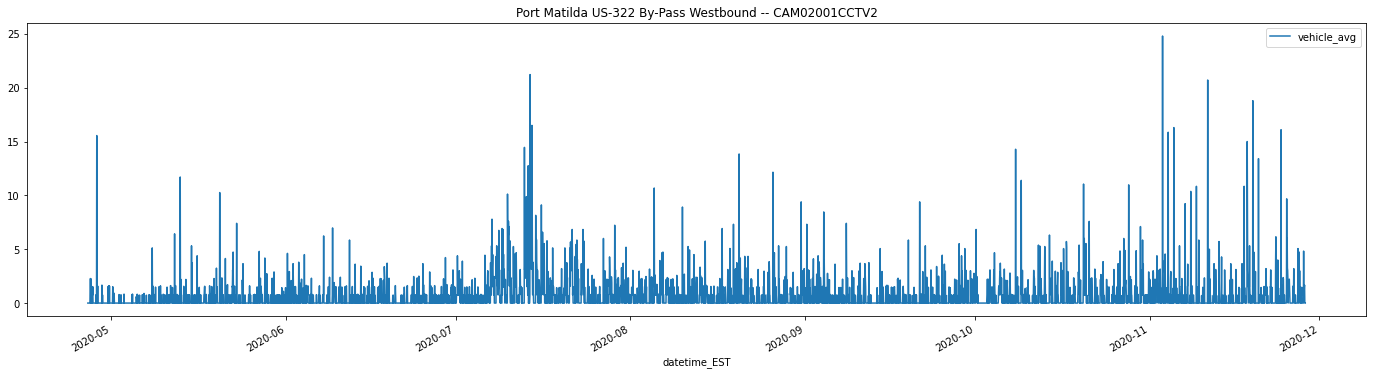

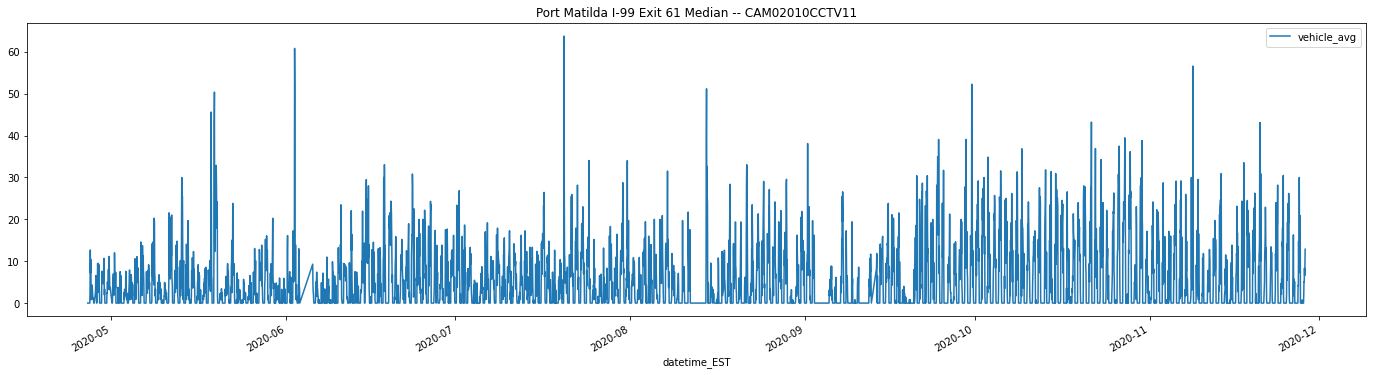

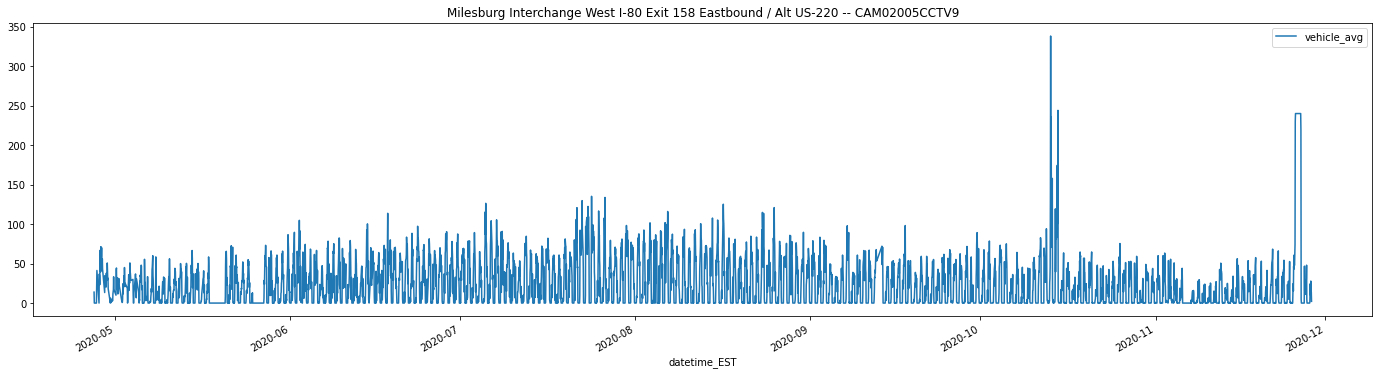

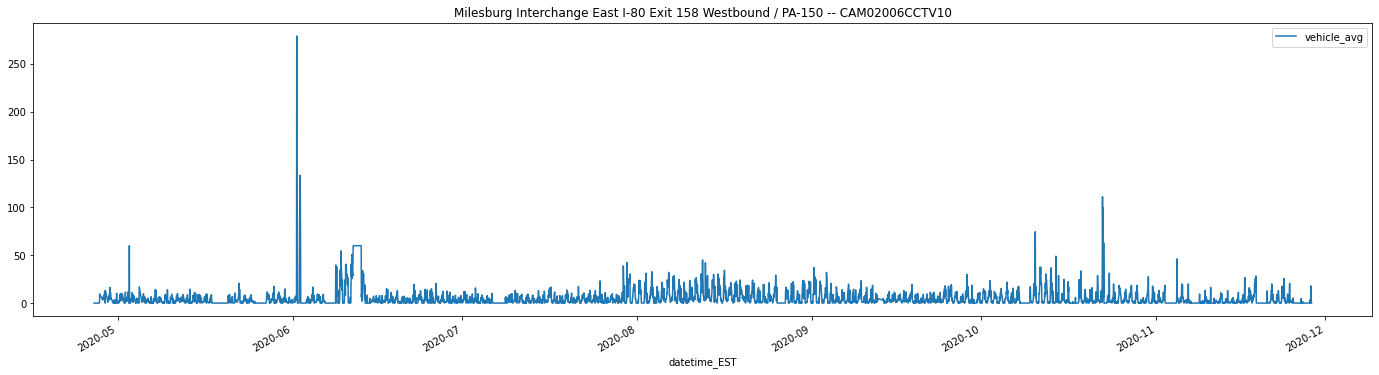

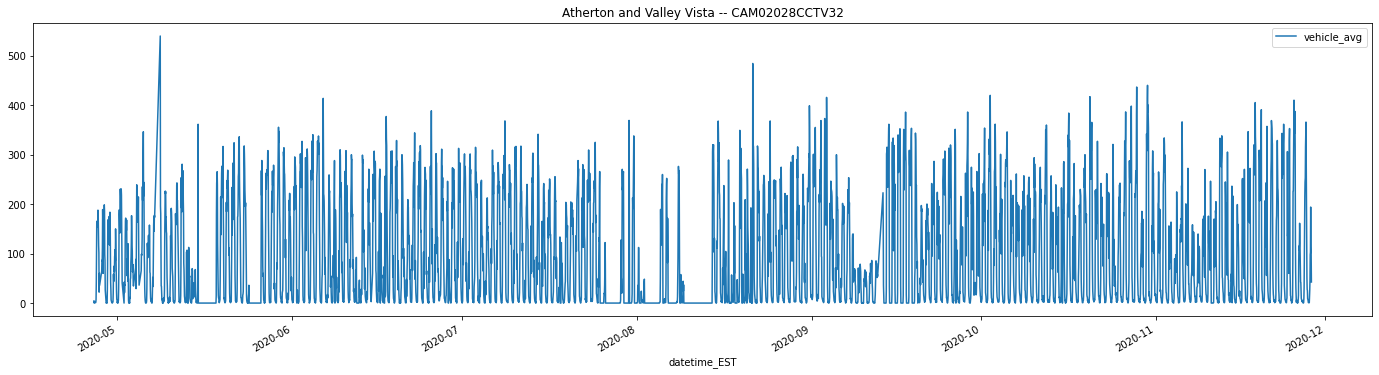

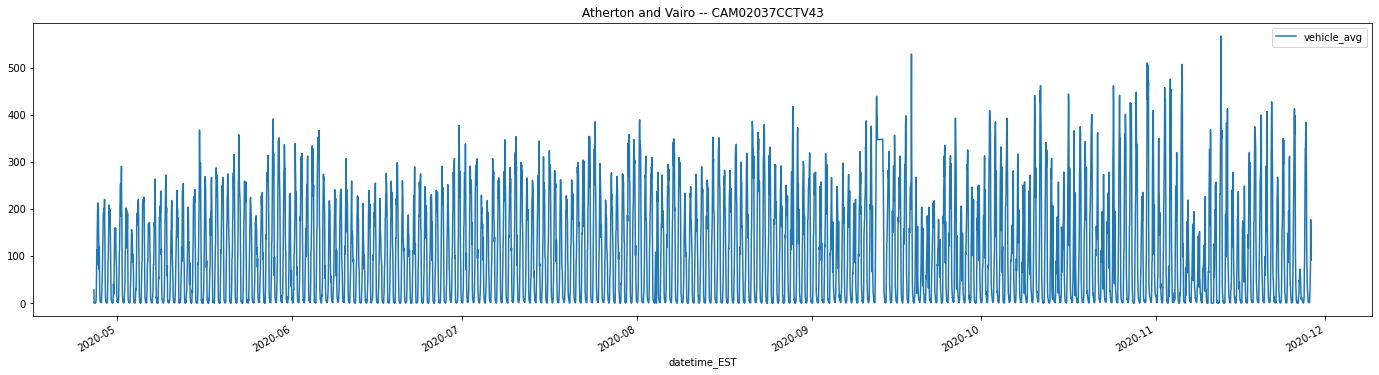

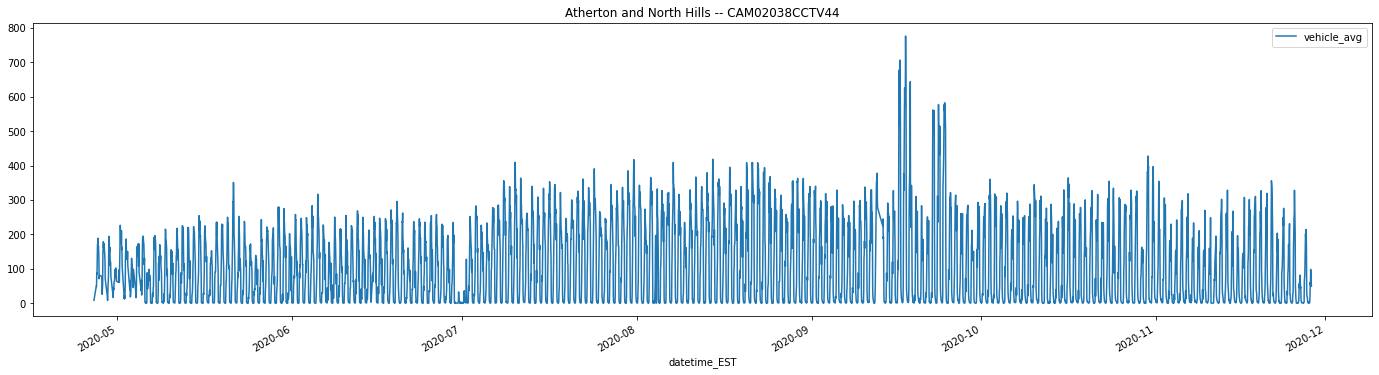

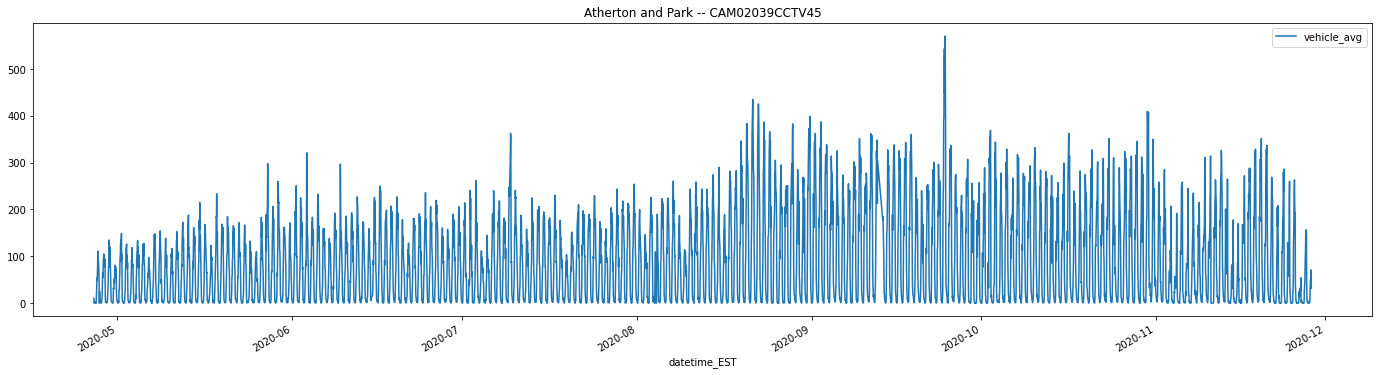

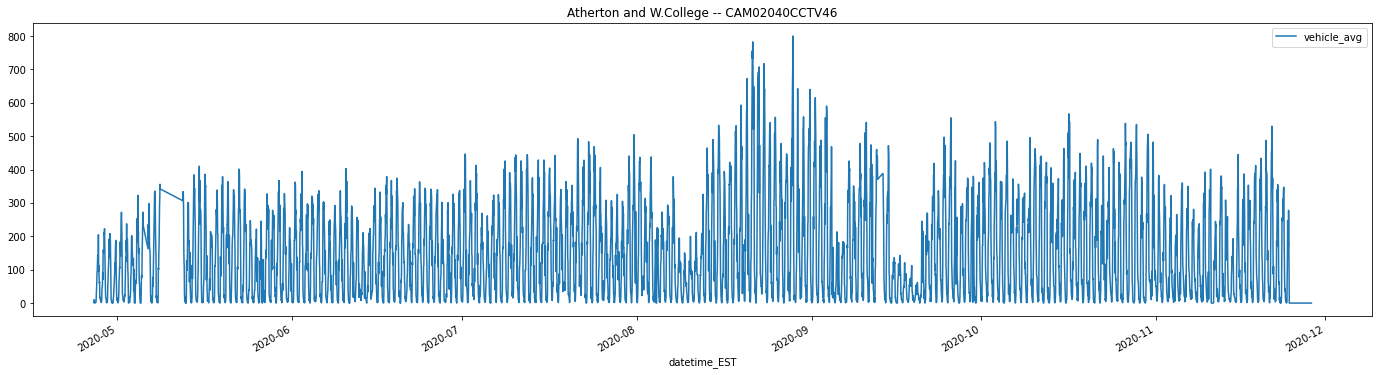

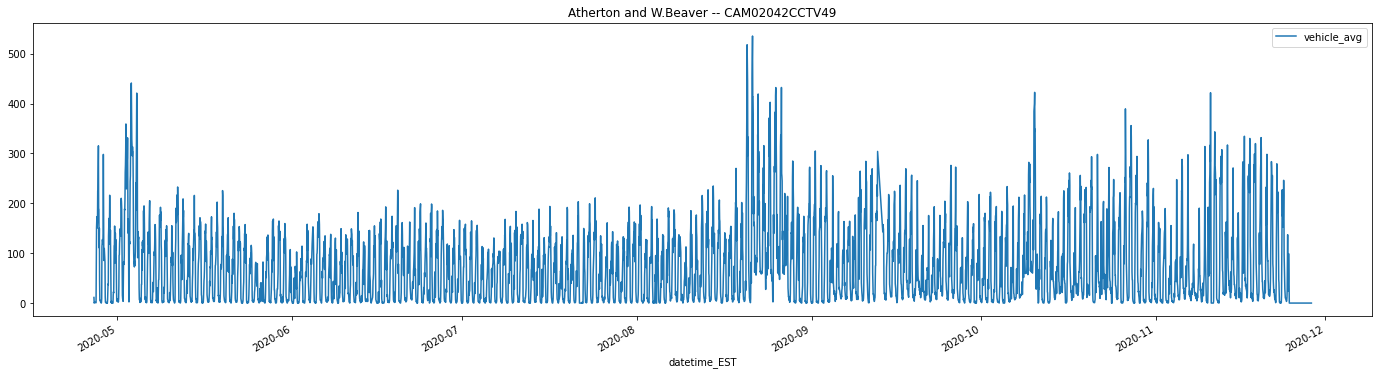

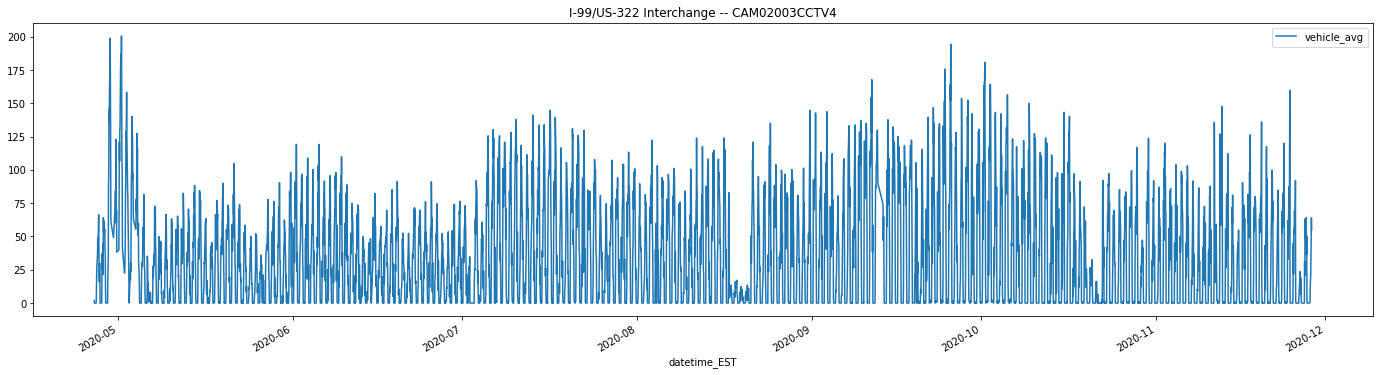

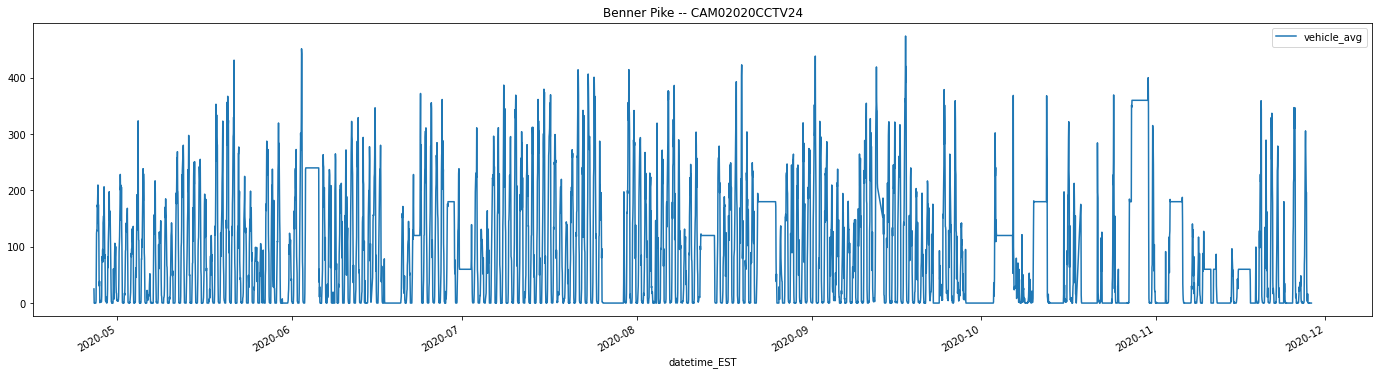

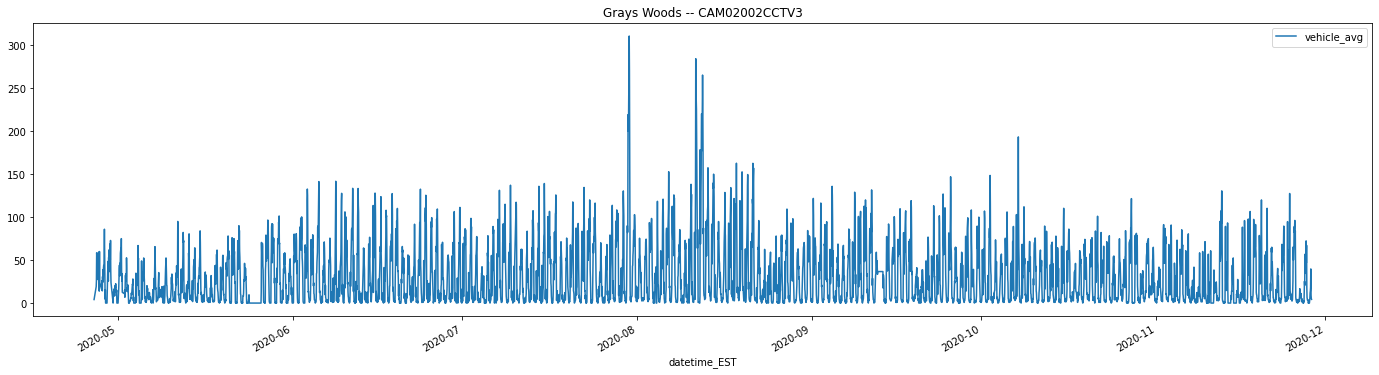

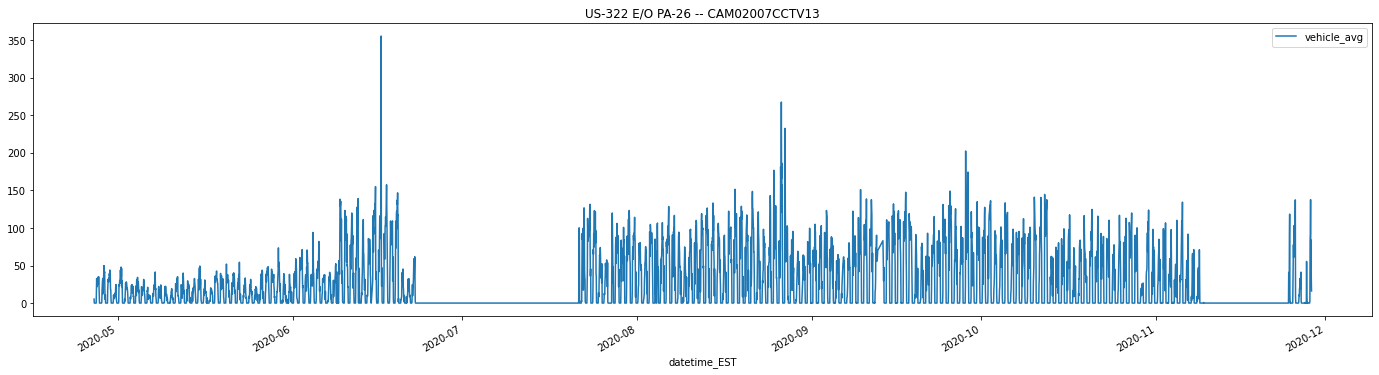

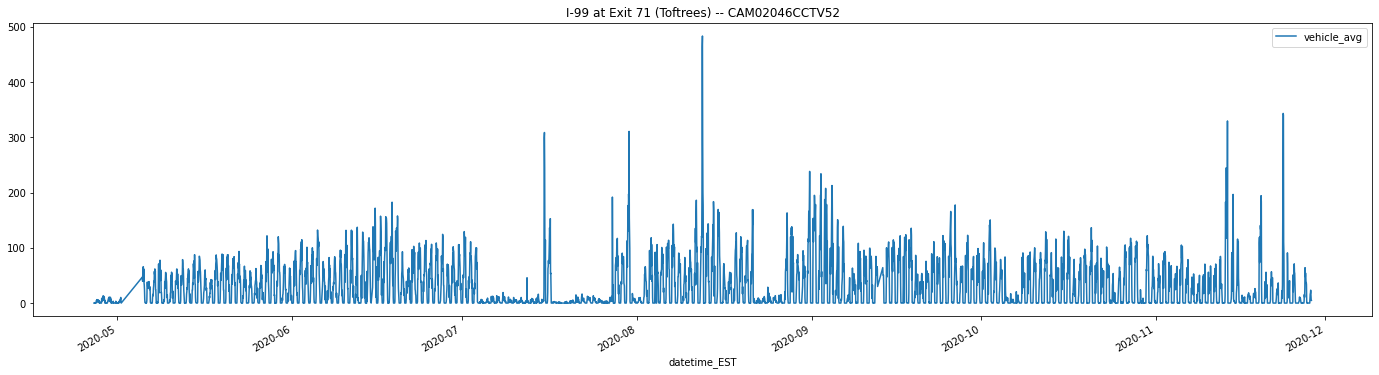

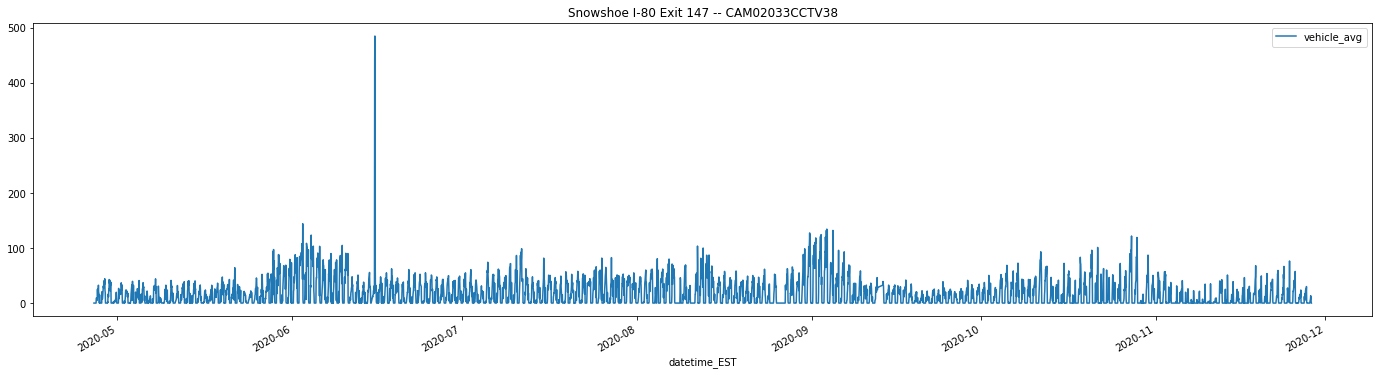

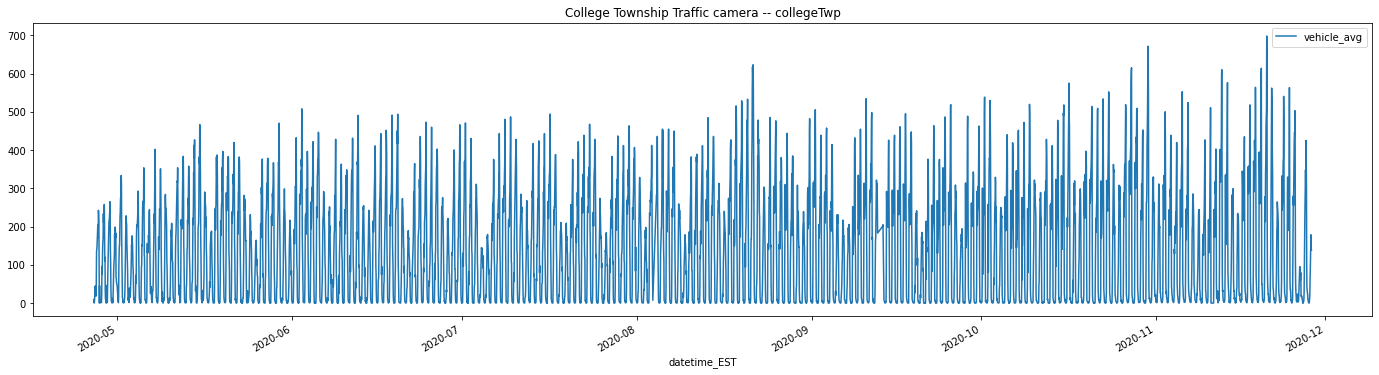

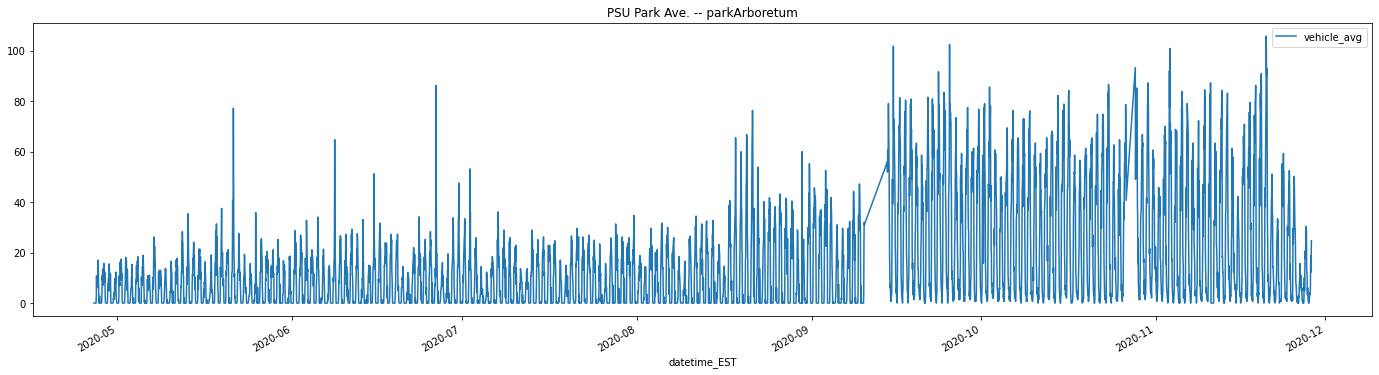

In [9]:

for c in cameras:
    cn = c[0][:-4]
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    ax = fdf_twp.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

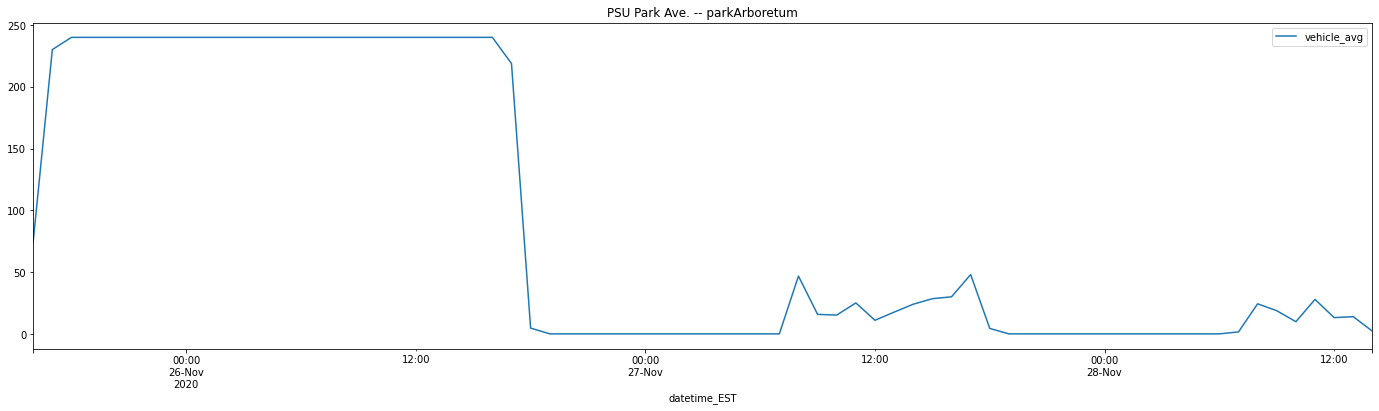

In [15]:
fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains("CAM02005")].copy()
    
fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
fdf_twp.sort_values(by='datetime_EST')
sds = fdf_twp[(fdf_twp['datetime_EST'] > '2020-11-25 15:00:00')]

ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

In [16]:
# drop frozen images from Benner Pike
# jun 3 12:05:14 jun 5 21:01:59
xdfn = xdf.drop(xdf[(xdf["camera_name"] == "CAM02020CCTV24") & (xdf['datetime_EST'] > '2020-6-3 12:05:14') & (xdf['datetime_EST'] <= '2020-6-5 21:01:59') ].index)

# jun 3 12:05:14 jun 5 21:01:59
xdfn1 = xdfn.drop(xdfn[(xdfn["camera_name"] == "CAM02020CCTV24") & (xdfn['datetime_EST'] > '2020-6-22 12:05:00') & (xdfn['datetime_EST'] <= '2020-6-23 15:50:00') ].index)

xdfn2 = xdfn1#.drop(xdfn1[(xdfn1["camera_name"] == "CAM02020CCTV24") & (xdfn1['datetime_EST'] > '2020-6-28 14:06:00') ].index)

# drop frozen images from Bellefonte exchange:
#(fdft['datetime_EST'] > '2020-8-18 12:04:00') & (fdft['datetime_EST'] < '2020-8-19 16:03:00')
xdfn3 = xdfn2.drop(xdfn2[(xdfn2["camera_name"] == "CAM02009CCTV7") & (xdfn2['datetime_EST'] > '2020-8-18 12:04:00') & (xdfn2['datetime_EST'] < '2020-8-19 16:03:00') ].index)

xdfn4 = xdfn3.drop(xdfn3[(xdfn3['datetime_EST'] > '2020-9-12 18:00:00') & (xdfn3['datetime_EST'] < '2020-9-13 13:00:00') ].index)

xdfn5 = xdfn4.drop(xdfn4[(xdfn4["camera_name"] == "CAM02020CCTV24") & (xdfn4['datetime_EST'] > '2020-10-10 12:00:00')].index)


xdfn6 = xdfn5.drop(xdfn5[(xdfn5["camera_name"] == "CAM02005CCTV9") & (xdfn5['datetime_EST'] > '2020-11-25 15:00:00') & (xdfn5['datetime_EST'] < '2020-11-27 00:00:00')].index)


In [17]:
icdf = xdfn6.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn6.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdfn6.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn6.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

In [18]:
#xdf.set_index('datetime_EST', drop=False, inplace=True)
#df_sampledh = xdf.set_index('datetime_EST').resample('H').sum().reset_index()

xdfn6.set_index('datetime_EST', drop=False, inplace=True)
df_sampledh = xdfn6.set_index('datetime_EST').resample('H').sum().reset_index()

In [19]:
merged = df_sampledh.merge(icdfs, on='datetime_EST')

In [20]:
df_sampledh = merged

In [21]:
def get_vc_avg(row):
    rv = 0.0
    if row.image_sum > 0:
        rv = (float(row.vehicle_count) / (float(row.image_sum)/(19.0 * 60.0)))
    return rv   



In [22]:
df_sampledh['vehicle_avg'] = df_sampledh.apply(get_vc_avg, axis=1)

In [23]:
df_sampledh.to_csv("vehicle_avg_per_hour_all_cameras_427-1128.csv",index=False)

In [16]:
#df_sampledh = pd.read_csv("vehicle_avg_per_hour_all_cameras_427-1110.csv")

In [24]:
def h2i (row):
    return int((row['datetime_EST']).strftime('%H'))

def date2day (row):
    return (row['datetime_EST']).dayofweek

In [25]:
#df_sampledh['Dates'] = pd.to_datetime(df_sampledh['datetime_EST']).dt.date
#df_sampledh['Time'] = pd.to_datetime(df_sampledh['datetime_EST']).dt.time
df_sampledh['ti'] = df_sampledh.apply (lambda row: h2i(row), axis=1)
df_sampledh['dy'] = df_sampledh.apply (lambda row: date2day(row), axis=1)


In [26]:
df_sampledh

,datetime_EST,vehicle_count,image_sum,vehicle_avg,ti,dy
0,2020-04-26 20:00:00,144,960,171.000000,20,6
1,2020-04-26 21:00:00,0,68,0.000000,21,6
2,2020-04-26 22:00:00,11,516,24.302326,22,6
3,2020-04-26 23:00:00,38,794,54.559194,23,6
4,2020-04-27 00:00:00,77,796,110.276382,0,0
...,...,...,...,...,...,...
5153,2020-11-28 10:00:00,906,1489,693.646743,10,5
5154,2020-11-28 11:00:00,1297,1402,1054.621969,11,5
5155,2020-11-28 12:00:00,1146,1461,894.209446,12,5
5156,2020-11-28 13:00:00,899,1450,706.800000,13,5


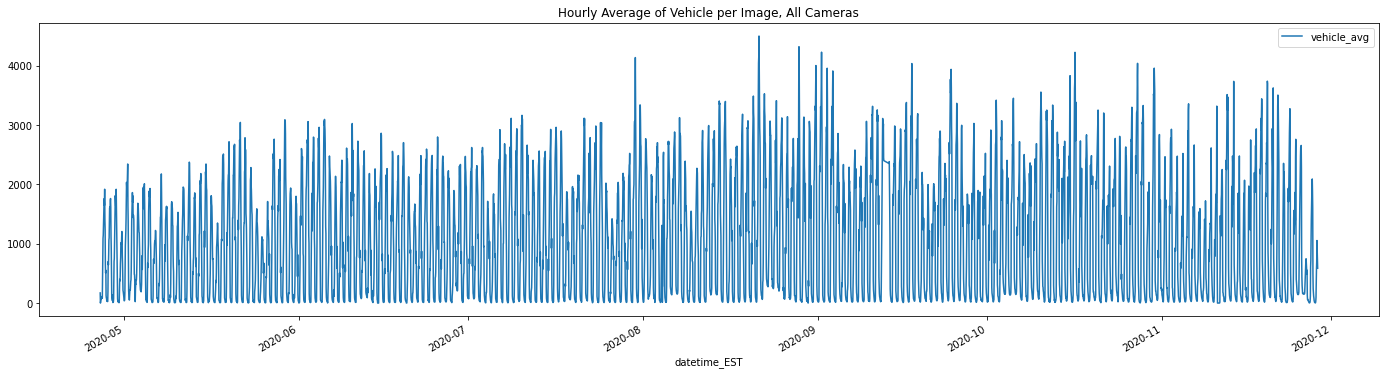

In [27]:
df_sampledh['datetime_EST'] = pd.to_datetime(df_sampledh['datetime_EST'])
df_sampledh.sort_values(by='datetime_EST')
df_sampledh.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title="Hourly Average of Vehicle per Image, All Cameras")

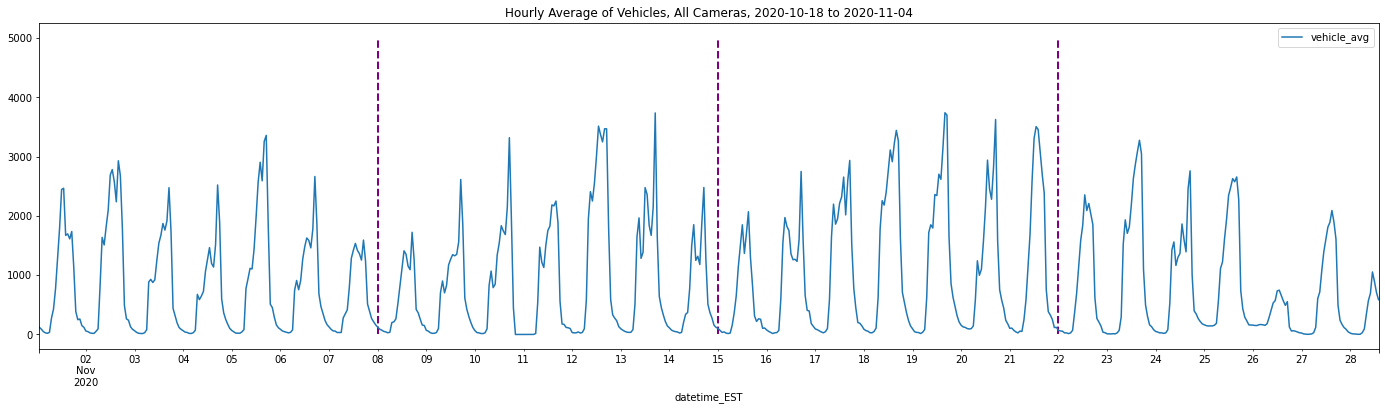

In [30]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2020-11-01 00:00:00') & (df_sampledh['datetime_EST'] < '2020-11-29 00:00:00')]
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title="Hourly Average of Vehicles, All Cameras, 2020-10-18 to 2020-11-04")
y_min = sds.vehicle_count.min()
y_max = sds.vehicle_count.max()

plt.vlines(x=[ '2020-11-01', '2020-11-08', '2020-11-15', '2020-11-22', '2020-11-29'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=2, label='vline_multiple')